In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def AUC_Loop(Y, probs):
    sprobs = sorted(probs)
    sensitivities, specificities = [], []
    for i in range(len(sprobs), -1, -1):
        if i == 0:
            cut_off = 0
        elif i == len(sprobs):
            cut_off = 1
        else:
            cut_off = (sprobs[i] + sprobs[i-1]) / 2
        y_i = np.array([1 if p > cut_off else 0 for p in sprobs])
        sensitivities.append( ((Y == 1) * (y_i == 1)).sum() / (Y == 1).sum() )
        specificities.append( ((Y == 0) * (y_i == 0)).sum() / (Y == 0).sum() )
        
        print(i, cut_off, y_i)

    return sensitivities, specificities

(1.0, 0.0)

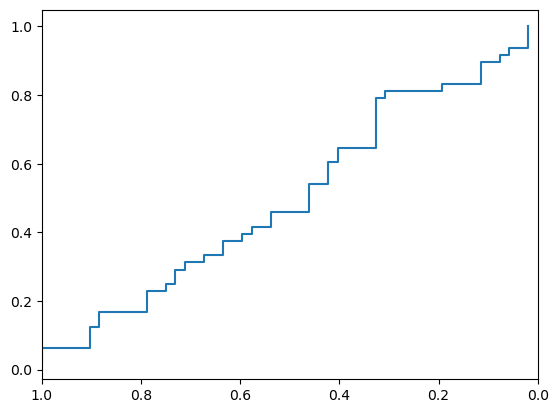

In [43]:
sensitivities, specificities = AUC_Loop(Y, probs)
plt.plot(sensitivities, specificities)
plt.xlim([1, 0])

7 1 [0 0 0 0 0 0 0]
6 0.905 [0 0 0 0 0 0 1]
5 0.79 [0 0 0 0 0 1 1]
4 0.6599999999999999 [0 0 0 0 1 1 1]
3 0.605 [0 0 0 1 1 1 1]
2 0.5700000000000001 [0 0 1 1 1 1 1]
1 0.46 [0 1 1 1 1 1 1]
0 0 [1 1 1 1 1 1 1]


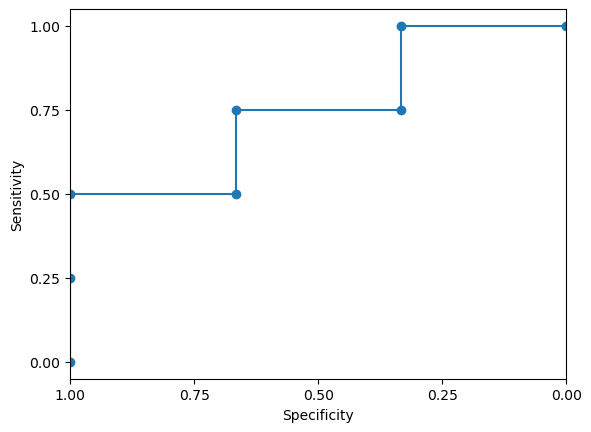

In [ ]:
Y = np.array([0, 1, 0, 1, 0, 1, 1])
probs = np.array([0.37, 0.55, 0.59, 0.62, 0.7, 0.88, 0.93])
sens, specs = AUC_Loop(Y, probs)

plt.plot(specs, sens, marker = 'o')
plt.xlim([1, 0])
plt.yticks([0, 0.25, 0.50, 0.75, 1.0])
plt.xticks([0, 0.25, 0.50, 0.75, 1.0])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.show();